# Exploratory Data Analysis 
Analysing affordable housing projects in California with Low-Income Housing Tax Credit (LIHTC)
- Objective: Gain insights to the awarding process
- Tasks: Figure out what are some of the common characteristics of the awarded projects. 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
# ensure changes in files are reflected
%load_ext autoreload
%autoreload 2
# Set display options to show all columns
pd.set_option('display.max_columns', None)  # Show all columns

In [2]:
award_df = pd.read_excel("../data/external/award_list.xlsx")
applicant_df = pd.read_excel("../data/external/2025-Applicant-list-4-per-R1.xlsx", header=1, index_col=None)

In [3]:
award_df.head()

,APPLICATION NUMBER,PROJECT NAME,CONSTRUCTION TYPE,HOUSING TYPE,CITY,COUNTY,TOTAL UNITS,LOW INCOME UNITS,MARKET RATE UNITS,TOTAL PROJECT COST,CONSTRUCTION BOND TAX-EXEMPT FINANCING AMOUNT,ANNUAL FEDERAL CREDIT REQUESTED,TOTAL STATE CREDIT REQUESTED,CDLAC POOL,"NC POOL SELECTION: HOMELESS, ELI/VLI, MIP",CDLAC GEOGRAPHIC REGION,CDLAC TOTAL POINTS SCORE,PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS),NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS),EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS),EXCEEDING MINIMUM RENT RESTRICTIONS (10 PTS),GP & MGMT. CO. EXPERIENCE (10 PTS),HOUSING NEEDS (10 PTS),LEVERAGED SOFT RESOURCES (8 PTS),READINESS TO PROCEED (10 PTS),AFFIRMATIVELY FURTHERING FAIR HOUSING (10 PTS),SERVICE AMENITIES (10 PTS),SITE AMENITIES (10 PTS),COST CONTAINMENT (12 PTS),CDLAC TIE-BREAKER SELF SCORE,AWARD,CDLAC APPLICANT,PARTNERSHIP NAME,GP 1 COMPANY NAME,GP 1 CONTACT NAME,GP 1 PARENT COMPANY,GP 2 COMPANY NAME (IF APPLICABLE),GP 2 CONTACT NAME (IF APPLICABLE),GP 2 PARENT COMPANY,GP 3 COMPANY NAME (IF APPLICABLE),GP 3 CONTACT NAME (IF APPLICABLE),GP 3 PARENT COMPANY
0,CA-25-404,TBV Villas at Renaissance,New Construction,Large Family,Richmond,Contra Costa,105,104,0,7.974608e+07,39172547.0,3404743,0,New Construction,NaN,Bay Area,119,0,10,20,10,10,10,8,10,9,10,10,12,1.289230,Yes,California Municipal Finance Authority,"Sandidge Urban Group, Inc.",Sandidge Urban Group,Cherene Sandidge,NaN,Guiding Light Inc.,Thomas Vaughns,NaN,NaN,NaN,NaN
1,CA-25-406,10953 Whipple,New Construction,Non-Targeted,Los Angeles,Los Angeles,91,90,0,2.704032e+07,13850000.0,1126137,0,New Construction,NaN,City of Los Angeles,119,0,10,20,10,10,10,8,10,9,10,10,12,1.562613,Yes,California Municipal Finance Authority,"HVN Development, LLC",HVN 10953 Whipple LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
2,CA-25-407,5403 Inglewood,New Construction,Non-Targeted,Los Angeles,Los Angeles,46,45,0,1.448602e+07,7325000.0,598975,0,New Construction,NaN,City of Los Angeles,119,0,10,20,10,10,10,8,10,9,10,10,12,1.309339,Yes,California Municipal Finance Authority,"HVN Development, LLC",HVN 5403 Inglewood LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
3,CA-25-409,9030-9038 Reading,New Construction,Non-Targeted,Los Angeles,Los Angeles,77,76,0,2.235169e+07,11430000.0,921903,0,New Construction,NaN,City of Los Angeles,119,0,10,20,10,10,10,8,10,9,10,10,12,1.641452,Yes,California Municipal Finance Authority,"HVN Development, LLC",HVN 9030-9038 Reading LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
4,CA-25-410,11218-11222 Califa,New Construction,Non-Targeted,Los Angeles,Los Angeles,76,75,0,2.158282e+07,11020000.0,908819,0,New Construction,NaN,City of Los Angeles,119,0,10,20,10,10,10,8,10,9,10,10,12,1.716578,Yes,California Municipal Finance Authority,"HVN Development, LLC",HVN 11218-11222 Califa LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN


In [4]:
applicant_df.head()

,APPLICATION NUMBER,PROJECT NAME,CONSTRUCTION TYPE,HOUSING TYPE,CITY,COUNTY,TOTAL UNITS,LOW INCOME UNITS,MARKET RATE UNITS,UNITS FOR HOMELESS,HOMELESS %,AVERAGE TARGETED AFFORDABILITY,TOTAL PROJECT COSTS,BOND REQUEST,ANNUAL FEDERAL CREDIT REQUEST,STATE CREDIT REQUEST,CDLAC POOL,NEW CONSTRUCTION SET ASIDE,BIPOC PRE-QUALIFIED,CTCAC REGION,CDLAC REGION,CDLAC TOTAL POINTS SCORE,PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS),NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS),EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS),EXCEEDING MINIMUM RENT RESTRICTIONS (10 PTS),GP & MGMT. CO. EXPERIENCE (10 PTS),HOUSING NEEDS (10 PTS),LEVERAGED SOFT RESOURCES (8 PTS),READINESS TO PROCEED (10 PTS),AFFIRMATIVELY FURTHERING FAIR HOUSING (10 PTS),SERVICE AMENITIES (10 PTS),COST CONTAINMENT (12 PTS),SITE AMENITIES (10 PTS),CDLAC TIE-BREAKER SELF SCORE,CDLAC APPLICANT,CTCAC APPLICANT,GP1 COMPANY,GP1 CONTACT,GP1 PARENT ORGANIZATION,GP2 COMPANY,GP2 CONTACT,GP2 PARENT COMPANY,GP3 COMPANY,GP3 CONTACT,GP3 PARENT COMPANY
0,CA-25-404,TBV Villas at Renaissance,New Construction,Large Family,Richmond,Contra Costa,105,104,0,0,0.0,0.520192,7.974608e+07,39172547.0,3453606,0,New Construction,NaN,Yes,East Bay Region: Alameda and Contra Costa Coun...,"Bay Area (Alameda, Contra Costa, Marin, San Fr...",120,0,10,20.0,10,10,10,8,10,10,10,12,10,1.270722,California Municipal Finance Authority,"GUIDING LIGHT INC-SANDIDGE URBAN GROUP, INC Jo...",Sandidge Urban Group,Cherene Sandidge,NaN,Guiding Light Inc.,Thomas Vaughns,NaN,NaN,NaN,NaN
1,CA-25-405,Adda and Paul Safran Senior Housing,Acq and Rehabilitation,Non-Targeted,Venice,Los Angeles,64,63,0,0,0.0,0.492063,4.326484e+07,21300000.0,1624431,0,Preservation,NaN,NaN,City of Los Angeles,City of Los Angeles,104,14,0,20.0,10,10,0,8,10,0,10,12,10,1.258159,City of Los Angeles,APS Venice LP,"Mountain Park Terrace, Inc.",Mary Grace Crisostomo,HumanGood Affordable Housing,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-25-406,10953 Whipple,New Construction,Non-Targeted,Los Angeles,Los Angeles,91,90,0,0,0.0,0.600000,2.704032e+07,13850000.0,1126137,0,New Construction,NaN,NaN,City of Los Angeles,City of Los Angeles,119,0,10,20.0,10,10,10,8,10,9,10,12,10,1.562613,California Municipal Finance Authority,"HVN Development, LLC",HVN 10953 Whipple LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
3,CA-25-407,5403 Inglewood,New Construction,Non-Targeted,Los Angeles,Los Angeles,46,45,0,0,0.0,0.600000,1.448602e+07,7325000.0,598975,0,New Construction,NaN,NaN,City of Los Angeles,City of Los Angeles,119,0,10,20.0,10,10,10,8,10,9,10,12,10,1.309339,California Municipal Finance Authority,"HVN Development, LLC",HVN 5403 Inglewood LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
4,CA-25-408,12432 Moorpark,New Construction,Non-Targeted,Los Angeles,Los Angeles,102,101,0,0,0.0,0.600000,3.478839e+07,17975000.0,1412345,0,New Construction,NaN,NaN,City of Los Angeles,City of Los Angeles,119,0,10,20.0,10,10,10,8,10,9,10,12,10,1.655012,California Municipal Finance Authority,HVN Development LLC,HVN 12432 Moorpark LLC,Tommy Beadel,HVN Development LLC,"Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN


In [5]:
award_df.dtypes

APPLICATION NUMBER                                            object
PROJECT NAME                                                  object
CONSTRUCTION TYPE                                             object
HOUSING TYPE                                                  object
CITY                                                          object
COUNTY                                                        object
TOTAL UNITS                                                    int64
LOW INCOME UNITS                                               int64
MARKET RATE UNITS                                              int64
TOTAL PROJECT COST                                           float64
CONSTRUCTION BOND TAX-EXEMPT FINANCING AMOUNT                float64
ANNUAL FEDERAL CREDIT REQUESTED                                int64
TOTAL STATE CREDIT REQUESTED                                   int64
CDLAC POOL                                                    object
NC POOL SELECTION: HOMELESS, ELI/V

In [6]:
applicant_df.dtypes

APPLICATION NUMBER                                            object
PROJECT NAME                                                  object
CONSTRUCTION TYPE                                             object
HOUSING TYPE                                                  object
CITY                                                          object
COUNTY                                                        object
TOTAL UNITS                                                    int64
LOW INCOME UNITS                                               int64
MARKET RATE UNITS                                              int64
UNITS FOR HOMELESS                                             int64
HOMELESS %                                                   float64
AVERAGE TARGETED AFFORDABILITY                               float64
TOTAL PROJECT COSTS                                          float64
BOND REQUEST                                                 float64
ANNUAL FEDERAL CREDIT REQUEST     

### Notes on data shape
- 90 applications, 37 awarded
- 42 columns for the award excel and 46 columns for the application

In [7]:
# Function to inspect a DataFrame
def inspect_dataframe(df, name):
    print(f"\n--- Inspecting {name} ---")
    
    # 1. Display column names and data types
    print("\nColumn Names and Data Types:")
    print(df.dtypes)
    
    # 2. Display first few rows
    print("\nSample Data (First 5 Rows):")
    print(df.head())
    
    # 3. Check for missing values
    print("\nMissing Values:")
    print(df.isnull().sum())
    
    # 4. Basic statistics for numeric columns
    print("\nBasic Statistics:")
    print(df.describe())

# Inspect both DataFrames
inspect_dataframe(award_df, "award_list.xlsx")


--- Inspecting award_list.xlsx ---

Column Names and Data Types:
APPLICATION NUMBER                                            object
PROJECT NAME                                                  object
CONSTRUCTION TYPE                                             object
HOUSING TYPE                                                  object
CITY                                                          object
COUNTY                                                        object
TOTAL UNITS                                                    int64
LOW INCOME UNITS                                               int64
MARKET RATE UNITS                                              int64
TOTAL PROJECT COST                                           float64
CONSTRUCTION BOND TAX-EXEMPT FINANCING AMOUNT                float64
ANNUAL FEDERAL CREDIT REQUESTED                                int64
TOTAL STATE CREDIT REQUESTED                                   int64
CDLAC POOL                           

In [8]:
inspect_dataframe(applicant_df, "2025-Applicant-list-4-per-R1.xlsx")


--- Inspecting 2025-Applicant-list-4-per-R1.xlsx ---

Column Names and Data Types:
APPLICATION NUMBER                                            object
PROJECT NAME                                                  object
CONSTRUCTION TYPE                                             object
HOUSING TYPE                                                  object
CITY                                                          object
COUNTY                                                        object
TOTAL UNITS                                                    int64
LOW INCOME UNITS                                               int64
MARKET RATE UNITS                                              int64
UNITS FOR HOMELESS                                             int64
HOMELESS %                                                   float64
AVERAGE TARGETED AFFORDABILITY                               float64
TOTAL PROJECT COSTS                                          float64
BOND REQUEST       


## Notes (for 2025-Applicant-list-4-per-R1.xlsx)
- Large variation in *project size* (standard deviation of 73 units)
- Most projects have nearly all units as low-income (very few market rate units)
- Some projects have a strong focus on homeless housing
- Most projects have 0% homeless units, but some dedicate all units to homeless
- Average *BOND REQUEST* is `$37.6M`, average *ANNUAL FEDERAL CREDIT REQUESTED* is `$3.34M`
- Most projects have zero *STATE CREDIT REQUESTED*
  - a reliance on federal credit rather than state credit 
- There are 4 different *CDLAC pools* for funds:
  1. New Construction
  2. Other Rehabilitation
  3. Rural
  4. Preservation
- *New Construction Set Aside*???
- BIPOC (black, indigenous, people of color) affirmative action type policy only applies to a handful of projects
- Geographical features
  - *CITY, COUNTY, CTCAC REGION, CDLAC REGION*
- All projects have max points for *EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS)*, *EXCEEDING MINIMUM RENT RESTRICTIONS (10 PTS)*, *GP & MGMT. CO. EXPERIENCE (10 PTS)*, *LEVERAGED SOFT RESOURCES (8 PTS)*, *READINESS TO PROCEED (10 PTS)*, *SERVICE AMENITIES (10 PTS)* and *SITE AMENITIES (10 PTS)*, *COST CONTAINMENT (12 PTS)*
  - therefore these features are not useful in differentiating the projects
 
- CDLAC (California Debt Limit Allocation Committee) and CTCAC (California Tax Credit Allocation Committee) are organisations that oversee tax-exempt bond financing and Low-Income Housing Tax Credits in California
- Tie-Breaker score is used to break ties, ranges from 0.35 to 2.4
- Some missing values in GP2 and GP3 (general partners)
- Overall, most projects are focused on affordable housing
- CDLAC allocates bonds through a competitive process, where projects are scored based on criteria such as affordability, project readiness, cost efficiency, and fair housing practices.
- The total possible points are 140, as the sum of all individual scoring categories (**20 for Preservation** + **10 for Density** + 20 for Income + 10 for Rent + 10 for GP Experience + **10 for Housing Needs** + 8 for Soft Resources + 10 for Readiness + **10 for Fair Housing** + 10 for Service Amenities + 10 for Site Amenities + 12 for Cost Containment = 140).
  - The features highlighted in bold are the features that differentiate projects (the rest of the features all projects score max points)
  - Points in applicant list is min = 90, max = 120. (no project achieved the maximum points of 140)

In [9]:
applicant_df['CDLAC TOTAL POINTS SCORE'].describe()

count     91.000000
mean     116.175824
std        5.361578
min       90.000000
25%      110.000000
50%      119.000000
75%      119.000000
max      120.000000
Name: CDLAC TOTAL POINTS SCORE, dtype: float64

In [10]:
applicant_df['PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS)'].describe()

count    91.000000
mean      5.296703
std       8.714604
min       0.000000
25%       0.000000
50%       0.000000
75%      14.000000
max      20.000000
Name: PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS), dtype: float64

In [11]:
applicant_df['NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS)'].describe()

count    91.000000
mean      7.142857
std       4.542568
min       0.000000
25%       0.000000
50%      10.000000
75%      10.000000
max      10.000000
Name: NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS), dtype: float64

In [12]:
applicant_df['EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS)'].describe()

count    9.100000e+01
mean     2.000000e+01
std      6.486338e-16
min      2.000000e+01
25%      2.000000e+01
50%      2.000000e+01
75%      2.000000e+01
max      2.000000e+01
Name: EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS), dtype: float64

## Notes (for award_list.xlsx)
- Why award_list only has 42 columns when application has 46 columns?
  - There are 6 missing columns (likely summarised in the additional columns)
    - UNITS FOR HOMELESS, HOMELESS %, AVERAGE TARGETED AFFORDABILITY, NEW CONSTRUCTION SET ASIDE, CTCAC REGION, CTCAC APPLICANT
  - 2 Additional columns: *'NC POOL SELECTION: HOMELESS, ELI/VLI, MIP'*, *AWARD*
  - Some columns are also renamed slightly (e.g., TOTAL PROJECT COSTS vs. TOTAL PROJECT COST)
  - Columns like UNITS FOR HOMELESS and HOMELESS % may be summarized in NC POOL SELECTION, which indicates whether a project prioritizes homeless housing, reducing redundancy.
- The high mean total score (117.82) suggests that only projects scoring near the maximum were awarded

In [13]:
applicant_df.sort_values(by = ['CDLAC TOTAL POINTS SCORE'], ascending = [False]).head()

,APPLICATION NUMBER,PROJECT NAME,CONSTRUCTION TYPE,HOUSING TYPE,CITY,COUNTY,TOTAL UNITS,LOW INCOME UNITS,MARKET RATE UNITS,UNITS FOR HOMELESS,HOMELESS %,AVERAGE TARGETED AFFORDABILITY,TOTAL PROJECT COSTS,BOND REQUEST,ANNUAL FEDERAL CREDIT REQUEST,STATE CREDIT REQUEST,CDLAC POOL,NEW CONSTRUCTION SET ASIDE,BIPOC PRE-QUALIFIED,CTCAC REGION,CDLAC REGION,CDLAC TOTAL POINTS SCORE,PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS),NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS),EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS),EXCEEDING MINIMUM RENT RESTRICTIONS (10 PTS),GP & MGMT. CO. EXPERIENCE (10 PTS),HOUSING NEEDS (10 PTS),LEVERAGED SOFT RESOURCES (8 PTS),READINESS TO PROCEED (10 PTS),AFFIRMATIVELY FURTHERING FAIR HOUSING (10 PTS),SERVICE AMENITIES (10 PTS),COST CONTAINMENT (12 PTS),SITE AMENITIES (10 PTS),CDLAC TIE-BREAKER SELF SCORE,CDLAC APPLICANT,CTCAC APPLICANT,GP1 COMPANY,GP1 CONTACT,GP1 PARENT ORGANIZATION,GP2 COMPANY,GP2 CONTACT,GP2 PARENT COMPANY,GP3 COMPANY,GP3 CONTACT,GP3 PARENT COMPANY
0,CA-25-404,TBV Villas at Renaissance,New Construction,Large Family,Richmond,Contra Costa,105,104,0,0,0.000000,0.520192,7.974608e+07,39172547.0,3453606,0,New Construction,NaN,Yes,East Bay Region: Alameda and Contra Costa Coun...,"Bay Area (Alameda, Contra Costa, Marin, San Fr...",120,0,10,20.0,10,10,10,8,10,10,10,12,10,1.270722,California Municipal Finance Authority,"GUIDING LIGHT INC-SANDIDGE URBAN GROUP, INC Jo...",Sandidge Urban Group,Cherene Sandidge,NaN,Guiding Light Inc.,Thomas Vaughns,NaN,NaN,NaN,NaN
18,CA-25-422,Beverly Gardens,New Construction,Large Family,Scotts Valley,Santa Cruz,25,24,0,0,0.000000,0.387500,2.695530e+07,13533707.0,1118646,0,Rural,NaN,NaN,"Central Coast Region: Monterey, San Luis Obisp...","Bay Area (Alameda, Contra Costa, Marin, San Fr...",120,0,10,20.0,10,10,10,8,10,10,10,12,10,1.584209,California Municipal Finance Authority,CRP Beverly Gardens LP,PSCDC Beverly LLC,Robert Laing,Pacific Southwest Community Development Corpor...,CRP Beverly Gardens AGP LLC,Paul Salib,NaN,NaN,NaN,NaN
12,CA-25-416,Clark Road Apartments,New Construction,Large Family,Paradise,Butte,72,71,0,18,0.253521,0.467606,4.946289e+07,24600335.0,1770311,0,Rural,NaN,NaN,"Northern Region: Butte, Marin, Napa, Shasta, S...","Northern (Butte, El Dorado, Placer, Sacramento...",120,0,10,20.0,10,10,10,8,10,10,10,12,10,0.802037,California Municipal Finance Authority,"Kingdom Development, Inc.","Kingdom CE, LLC",William Leach,"Kingdom Development, Inc.",Zen Development LLC,Zen Sawyer,NaN,NaN,NaN,NaN
22,CA-25-426,Berryessa Family Apartments,New Construction,Large Family,San Jose,Santa Clara,260,257,0,0,0.000000,0.598833,1.400918e+08,69000000.0,7126766,0,New Construction,NaN,NaN,South and West Bay Region: San Mateo and Santa...,"Bay Area (Alameda, Contra Costa, Marin, San Fr...",120,0,10,20.0,10,10,10,8,10,10,10,12,10,1.405562,California Municipal Finance Authority,Green Valley Corporation,Green Valley Corporation,Mark Pilarczyk,Green Valle Corp. dba Swenson,"PacH San Jose Holdings, LLC",Mat Eland,"Pacific Housing, Inc.",NaN,NaN,NaN
23,CA-25-427,VA Building 408,New Construction,Special Needs,Los Angeles,Los Angeles,101,100,0,100,1.000000,0.500000,7.705777e+07,40700000.0,3771815,0,New Construction,"Homeless, ELI/VLI",NaN,Balance of Los Angeles County,Balance of Los Angeles County,120,0,10,20.0,10,10,10,8,10,10,10,12,10,1.207620,California Housing Finance Agency,VA Building 408 LP,Housing Corporation of America,Carol Cromar,NaN,VA Building 408 LLC,Jordan Pynes,TSA Housing Inc.,NaN,NaN,NaN


In [14]:
award_df.sort_values(by = ['CDLAC TOTAL POINTS SCORE'], ascending = [False]).head()

,APPLICATION NUMBER,PROJECT NAME,CONSTRUCTION TYPE,HOUSING TYPE,CITY,COUNTY,TOTAL UNITS,LOW INCOME UNITS,MARKET RATE UNITS,TOTAL PROJECT COST,CONSTRUCTION BOND TAX-EXEMPT FINANCING AMOUNT,ANNUAL FEDERAL CREDIT REQUESTED,TOTAL STATE CREDIT REQUESTED,CDLAC POOL,"NC POOL SELECTION: HOMELESS, ELI/VLI, MIP",CDLAC GEOGRAPHIC REGION,CDLAC TOTAL POINTS SCORE,PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS),NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS),EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS),EXCEEDING MINIMUM RENT RESTRICTIONS (10 PTS),GP & MGMT. CO. EXPERIENCE (10 PTS),HOUSING NEEDS (10 PTS),LEVERAGED SOFT RESOURCES (8 PTS),READINESS TO PROCEED (10 PTS),AFFIRMATIVELY FURTHERING FAIR HOUSING (10 PTS),SERVICE AMENITIES (10 PTS),SITE AMENITIES (10 PTS),COST CONTAINMENT (12 PTS),CDLAC TIE-BREAKER SELF SCORE,AWARD,CDLAC APPLICANT,PARTNERSHIP NAME,GP 1 COMPANY NAME,GP 1 CONTACT NAME,GP 1 PARENT COMPANY,GP 2 COMPANY NAME (IF APPLICABLE),GP 2 CONTACT NAME (IF APPLICABLE),GP 2 PARENT COMPANY,GP 3 COMPANY NAME (IF APPLICABLE),GP 3 CONTACT NAME (IF APPLICABLE),GP 3 PARENT COMPANY
20,CA-25-457,West LA VA- Building 409,New Construction,Special Needs,Unincorporated LA County,Los Angeles,117,115,0,79894524.0,41767000.0,3938533,0,New Construction,"Homeless, ELI/VLI",Balance of Los Angeles County,120,0,10,20,10,10,10,8,10,10,10,10,12,1.347801,Yes,California Housing Finance Agency,"Century Affordable Development, Inc. (CADI)","Century Affordable Development, Inc.",Oscar Alvarado,"Century Affordable Development, Inc.",NaN,NaN,NaN,NaN,NaN,NaN
15,CA-25-445,San Marcos Ranch,New Construction,Large Family,Santa Barbara,Santa Barbara,236,234,0,125532912.0,66000000.0,6397415,0,New Construction,NaN,Coastal,120,0,10,20,10,10,10,8,10,10,10,10,12,1.269063,Yes,Housing Authority of the County of Santa Barbara,"Pacific West Communities, Inc.",Surf Development Company,Robert P. Havlicek Jr.,NaN,"TPC Holdings IX, LLC",Caleb Roope,The Pacific Companies,Housing Authority of the County of Santa Barbara,Robert P. Havlicek Jr,NaN
12,CA-25-434,U.S.VETS-WLAVA Building 256,New Construction,Special Needs,Los Angeles,Los Angeles,41,40,0,43614766.0,22432000.0,1747299,0,New Construction,"Homeless, ELI/VLI",Balance of Los Angeles County,120,0,10,20,10,10,10,8,10,10,10,10,12,0.930300,Yes,California Housing Finance Agency,U.S.VETS Housing Corporation,"U.S.VETS-WLAVA Building 256, LLC",Lori Allgood,U.S.VETS Housing Corporation,"Kingdom Greenleaf, LLC",William Leach,"Kingdom Development, Inc.",NaN,NaN,NaN
8,CA-25-427,VA Building 408,New Construction,Special Needs,Los Angeles,Los Angeles,101,100,0,77057767.0,40700000.0,3771815,0,New Construction,"Homeless, ELI/VLI",Balance of Los Angeles County,120,0,10,20,10,10,10,8,10,10,10,10,12,1.207620,Yes,California Housing Finance Agency,"TSA Housing, Inc.",Housing Corporation of America,Carol Cromar,NaN,VA Building 408 LLC,Jordan Pynes,TSA Housing Inc.,NaN,NaN,NaN
7,CA-25-426,Berryessa Family Apartments,New Construction,Large Family,San Jose,Santa Clara,260,257,0,140091791.0,69000000.0,7126766,0,New Construction,NaN,Bay Area,120,0,10,20,10,10,10,8,10,10,10,10,12,1.398062,Yes,California Municipal Finance Authority,Green Valley Corp. dba Swenson,Green Valley Corporation,Mark Pilarczyk,Green Valle Corp. dba Swenson,"PacH San Jose Holdings, LLC",Mat Eland,"Pacific Housing, Inc.",NaN,NaN,NaN


## Merging dataframes
- Since there are alot of differences in the column names for the two tables, we just assume that most of the columns are duplicates of each other besides the ones we mentioned in the Notes
- Extract just the important columns from award_df and merge them into applicant_df

In [15]:
important_columns = ['APPLICATION NUMBER', 'NC POOL SELECTION: HOMELESS, ELI/VLI, MIP', 'AWARD']

In [16]:
award_df_important = award_df[important_columns]

In [17]:
merged_df = pd.merge(award_df_important, applicant_df, how = 'right', on = 'APPLICATION NUMBER')

In [26]:
merged_df.head()

,APPLICATION NUMBER,"NC POOL SELECTION: HOMELESS, ELI/VLI, MIP",AWARD,PROJECT NAME,CONSTRUCTION TYPE,HOUSING TYPE,CITY,COUNTY,TOTAL UNITS,LOW INCOME UNITS,MARKET RATE UNITS,UNITS FOR HOMELESS,HOMELESS %,AVERAGE TARGETED AFFORDABILITY,TOTAL PROJECT COSTS,BOND REQUEST,ANNUAL FEDERAL CREDIT REQUEST,STATE CREDIT REQUEST,CDLAC POOL,NEW CONSTRUCTION SET ASIDE,BIPOC PRE-QUALIFIED,CTCAC REGION,CDLAC REGION,CDLAC TOTAL POINTS SCORE,PRESERVATION AND OTHER REHAB. PROJECT PRIORITIES (20 PTS),NEW CONSTRUCTION DENSITY & LOCAL INCENTIVES (10 PTS),EXCEEDING MINIMUM INCOME RESTRICTIONS (20 PTS),EXCEEDING MINIMUM RENT RESTRICTIONS (10 PTS),GP & MGMT. CO. EXPERIENCE (10 PTS),HOUSING NEEDS (10 PTS),LEVERAGED SOFT RESOURCES (8 PTS),READINESS TO PROCEED (10 PTS),AFFIRMATIVELY FURTHERING FAIR HOUSING (10 PTS),SERVICE AMENITIES (10 PTS),COST CONTAINMENT (12 PTS),SITE AMENITIES (10 PTS),CDLAC TIE-BREAKER SELF SCORE,CDLAC APPLICANT,CTCAC APPLICANT,GP1 COMPANY,GP1 CONTACT,GP1 PARENT ORGANIZATION,GP2 COMPANY,GP2 CONTACT,GP2 PARENT COMPANY,GP3 COMPANY,GP3 CONTACT,GP3 PARENT COMPANY
0,CA-25-404,NaN,Yes,TBV Villas at Renaissance,New Construction,Large Family,Richmond,Contra Costa,105,104,0,0,0.0,0.520192,7.974608e+07,39172547.0,3453606,0,New Construction,NaN,Yes,East Bay Region: Alameda and Contra Costa Coun...,"Bay Area (Alameda, Contra Costa, Marin, San Fr...",120,0,10,20.0,10,10,10,8,10,10,10,12,10,1.270722,California Municipal Finance Authority,"GUIDING LIGHT INC-SANDIDGE URBAN GROUP, INC Jo...",Sandidge Urban Group,Cherene Sandidge,NaN,Guiding Light Inc.,Thomas Vaughns,NaN,NaN,NaN,NaN
1,CA-25-405,NaN,No,Adda and Paul Safran Senior Housing,Acq and Rehabilitation,Non-Targeted,Venice,Los Angeles,64,63,0,0,0.0,0.492063,4.326484e+07,21300000.0,1624431,0,Preservation,NaN,NaN,City of Los Angeles,City of Los Angeles,104,14,0,20.0,10,10,0,8,10,0,10,12,10,1.258159,City of Los Angeles,APS Venice LP,"Mountain Park Terrace, Inc.",Mary Grace Crisostomo,HumanGood Affordable Housing,NaN,NaN,NaN,NaN,NaN,NaN
2,CA-25-406,NaN,Yes,10953 Whipple,New Construction,Non-Targeted,Los Angeles,Los Angeles,91,90,0,0,0.0,0.600000,2.704032e+07,13850000.0,1126137,0,New Construction,NaN,NaN,City of Los Angeles,City of Los Angeles,119,0,10,20.0,10,10,10,8,10,9,10,12,10,1.562613,California Municipal Finance Authority,"HVN Development, LLC",HVN 10953 Whipple LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
3,CA-25-407,NaN,Yes,5403 Inglewood,New Construction,Non-Targeted,Los Angeles,Los Angeles,46,45,0,0,0.0,0.600000,1.448602e+07,7325000.0,598975,0,New Construction,NaN,NaN,City of Los Angeles,City of Los Angeles,119,0,10,20.0,10,10,10,8,10,9,10,12,10,1.309339,California Municipal Finance Authority,"HVN Development, LLC",HVN 5403 Inglewood LLC,Tommy Beadel,"HVN Development, LLC","Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN
4,CA-25-408,NaN,No,12432 Moorpark,New Construction,Non-Targeted,Los Angeles,Los Angeles,102,101,0,0,0.0,0.600000,3.478839e+07,17975000.0,1412345,0,New Construction,NaN,NaN,City of Los Angeles,City of Los Angeles,119,0,10,20.0,10,10,10,8,10,9,10,12,10,1.655012,California Municipal Finance Authority,HVN Development LLC,HVN 12432 Moorpark LLC,Tommy Beadel,HVN Development LLC,"Affordable Housing Alliance II, Inc. dba Integ...",Anjela Ponce,"Affordable Housing Alliance II, Inc.",NaN,NaN,NaN


In [19]:
merged_df.shape

(91, 48)

In [20]:
merged_df['AWARD'] = merged_df['AWARD'].fillna("No")

### Total Points and Self Score
  - Unsurprisingly, the *CDLAC TOTAL POINTS SCORE* scored for awarded projects are much higher on average
  - You need to have a total points of 119 to be competitive (median of those awarded)
  - Surprisingly, the *CDLAC TIE-BREAKER SELF SCORE* scored for awarded projects have a similar median and the top scores are not awarded. This could indicate that the tie-breaker scores is likely not an important consideration
  - You need to have a tie-breaker score of 125% to be competitive (median of those awarded)

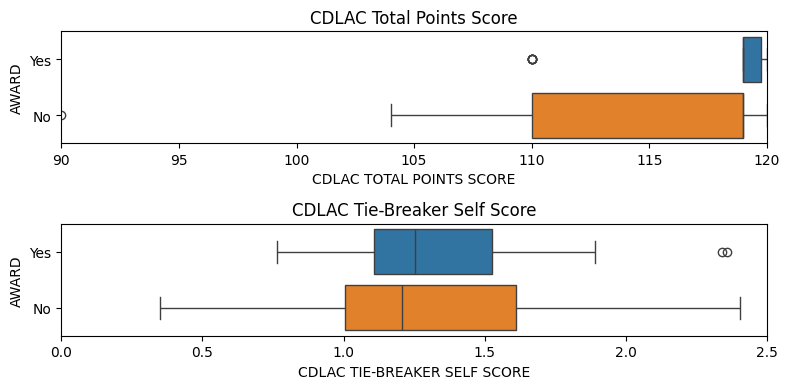

In [21]:
# Create a 2x1 subplot grid
f, axes = plt.subplots(2, 1, figsize=(8, 4))

# Plot the first boxplot (CDLAC TOTAL POINTS SCORE) on the first subplot
sb.boxplot(data=merged_df, x='CDLAC TOTAL POINTS SCORE', y = "AWARD", orient='h', ax=axes[0], hue = "AWARD")
axes[0].set_title('CDLAC Total Points Score')
axes[0].set_xlim(90, 120)
# Plot the second boxplot (CDLAC TIE-BREAKER SELF SCORE) on the second subplot
sb.boxplot(data=merged_df, x='CDLAC TIE-BREAKER SELF SCORE', y = "AWARD", orient='h', ax=axes[1], hue = "AWARD")
axes[1].set_title('CDLAC Tie-Breaker Self Score')
axes[1].set_xlim(0, 2.5)
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [33]:
awarded_mask = merged_df["AWARD"] == "Yes"
awarded_mask

0      True
1     False
2      True
3      True
4     False
      ...  
86     True
87    False
88     True
89    False
90     True
Name: AWARD, Length: 91, dtype: bool

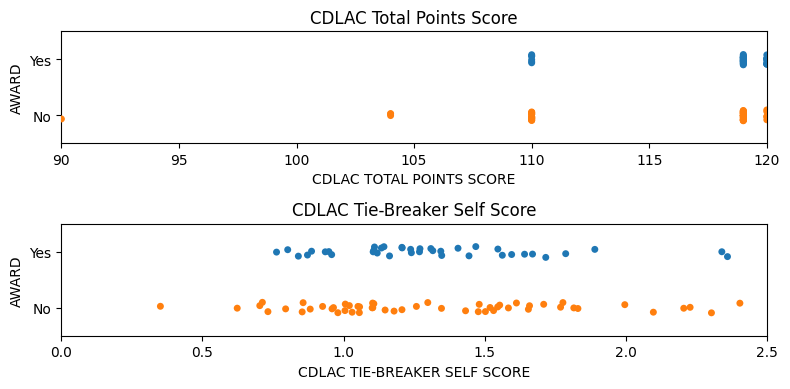

In [23]:
# sb.swarmplot(x = "CDLAC TOTAL POINTS SCORE", y = "AWARD", data = merged_df, orient = "h")

# Create a 2x1 subplot grid
f, axes = plt.subplots(2, 1, figsize=(8, 4))

# Plot the first boxplot (CDLAC TOTAL POINTS SCORE) on the first subplot
sb.stripplot(data=merged_df, x='CDLAC TOTAL POINTS SCORE', y = "AWARD", orient='h', ax=axes[0], hue = "AWARD")
axes[0].set_title('CDLAC Total Points Score')
axes[0].set_xlim(90, 120)
# Plot the second boxplot (CDLAC TIE-BREAKER SELF SCORE) on the second subplot
sb.stripplot(data=merged_df, x='CDLAC TIE-BREAKER SELF SCORE', y = "AWARD", orient='h', ax=axes[1], hue = "AWARD")
axes[1].set_title('CDLAC Tie-Breaker Self Score')
axes[1].set_xlim(0, 2.5)
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Project Pool (New Construction, Preservation, Rural, Other Rehabilitation).
  - *New Construction* projects are the best performing category (50% of projects awarded)
  - *Other Rehabilitation* is the worst performing category (Only 10% of projects award)

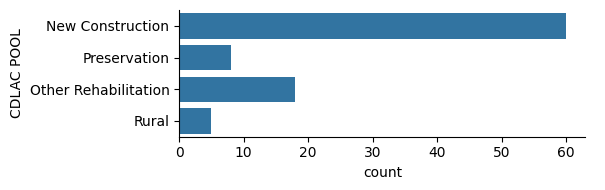

In [24]:
sb.catplot(y = 'CDLAC POOL', data = merged_df, kind = 'count', order = ['New Construction', 'Preservation', 'Other Rehabilitation', 'Rural'], height = 2, aspect = 3)

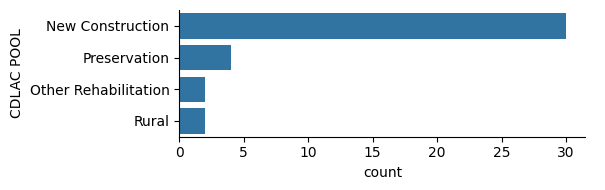

In [34]:
sb.catplot(y = 'CDLAC POOL', data = merged_df[awarded_mask], kind = 'count', order = ['New Construction', 'Preservation', 'Other Rehabilitation', 'Rural'], height = 2, aspect = 3)

In [35]:
pool_counts = merged_df['CDLAC POOL'].value_counts()

In [36]:
pool_counts.head()

CDLAC POOL
New Construction        60
Other Rehabilitation    18
Preservation             8
Rural                    5
Name: count, dtype: int64

In [37]:
pool_counts_awarded = merged_df[awarded_mask]['CDLAC POOL'].value_counts()

In [38]:
pool_counts_awarded.head()

CDLAC POOL
New Construction        30
Preservation             4
Rural                    2
Other Rehabilitation     2
Name: count, dtype: int64

In [39]:
merged_pool = pd.concat([pool_counts_awarded, pool_counts], axis = 1, ignore_index = True)

In [40]:
merged_pool.head()

,0,1
CDLAC POOL,,
New Construction,30,60
Preservation,4,8
Rural,2,5
Other Rehabilitation,2,18


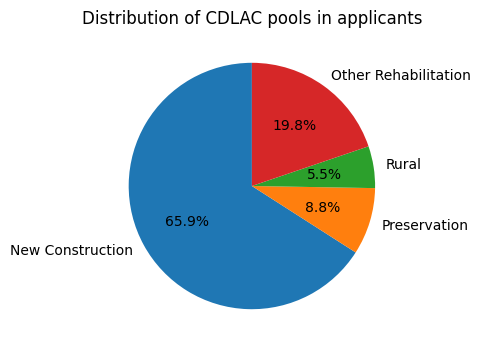

In [41]:
plt.figure(figsize=(4, 4))  # Set the size of the figure
plt.pie(merged_pool[1], labels=merged_pool[1].index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of CDLAC pools in applicants')  # Adding a title to the pie chart
plt.show()

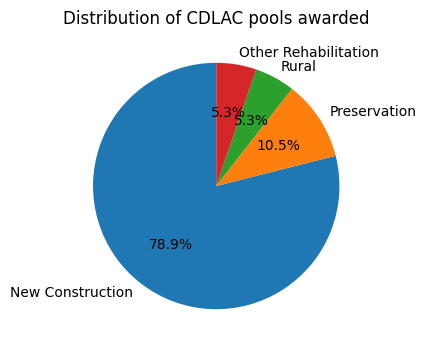

In [105]:
plt.figure(figsize=(4, 4))  # Set the size of the figure
plt.pie(merged_pool[0], labels=merged_pool[0].index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of CDLAC pools awarded')  # Adding a title to the pie chart
plt.show()

### Compare average points and tiebreaker scores for awarded vs. rejected projects by pool

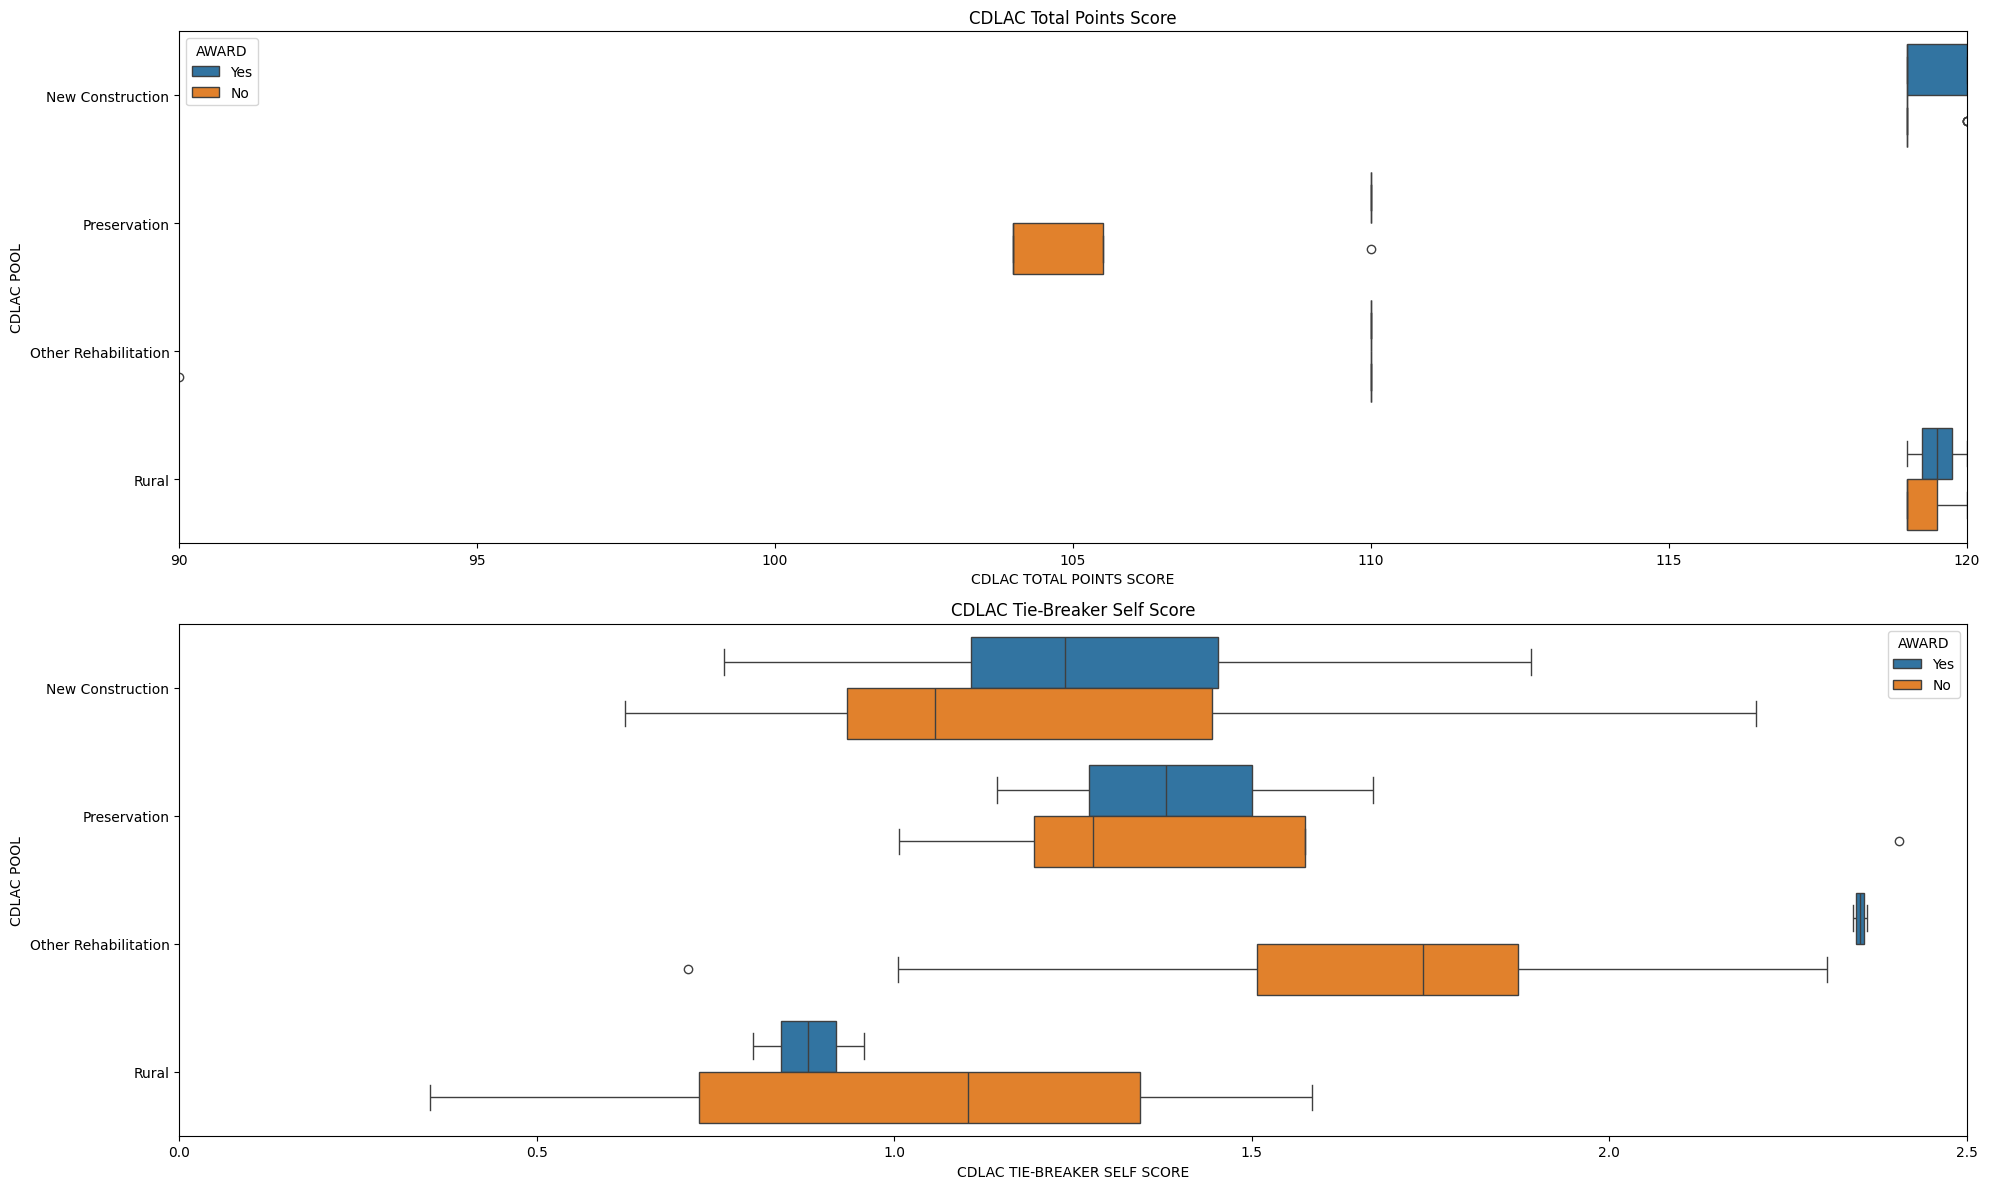

In [162]:
# Create a 2x1 subplot grid
f, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot the first boxplot (CDLAC TOTAL POINTS SCORE) on the first subplot
sb.boxplot(data=merged_df, x='CDLAC TOTAL POINTS SCORE', y = "CDLAC POOL", orient='h', ax=axes[0], hue = "AWARD")
axes[0].set_title('CDLAC Total Points Score')
axes[0].set_xlim(90, 120)
# Plot the second boxplot (CDLAC TIE-BREAKER SELF SCORE) on the second subplot
sb.boxplot(data=merged_df, x='CDLAC TIE-BREAKER SELF SCORE', y = "CDLAC POOL", orient='h', ax=axes[1], hue = "AWARD")
axes[1].set_title('CDLAC Tie-Breaker Self Score')
axes[1].set_xlim(0, 2.5)
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

### Regions (*CITY, COUNTY, CTCAC REGION, CDLAC REGION*)
- Coastal, Bay Area and City are really poor performers

/home/dsfee222/.virtualenvs/affordable_housing/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


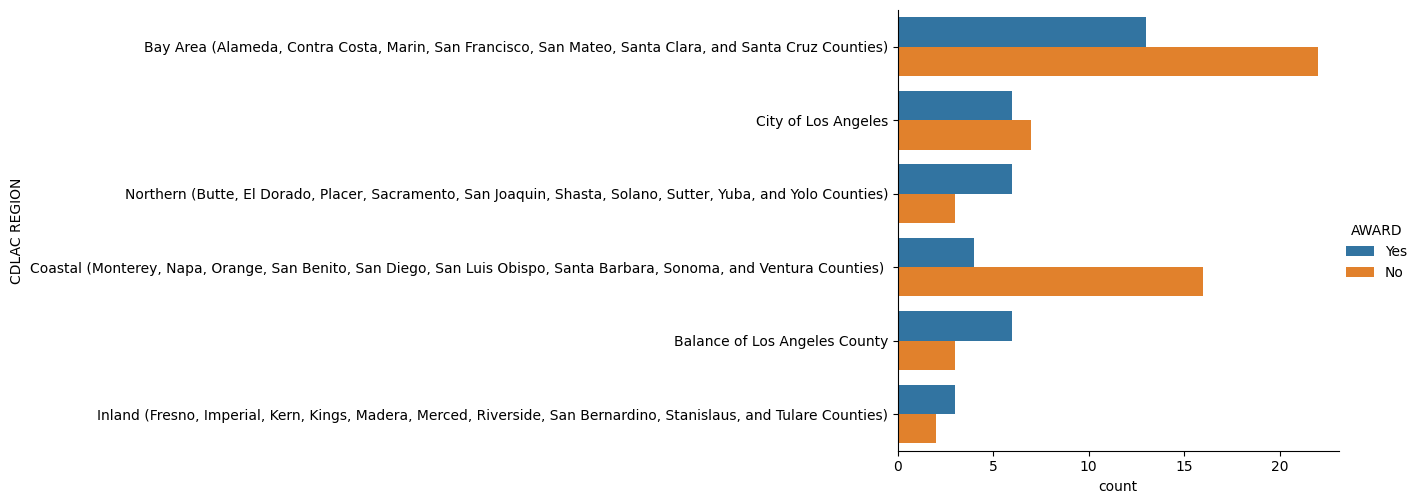

In [171]:
sb.catplot(data = merged_df, y = "CDLAC REGION", kind = "count", hue = "AWARD")

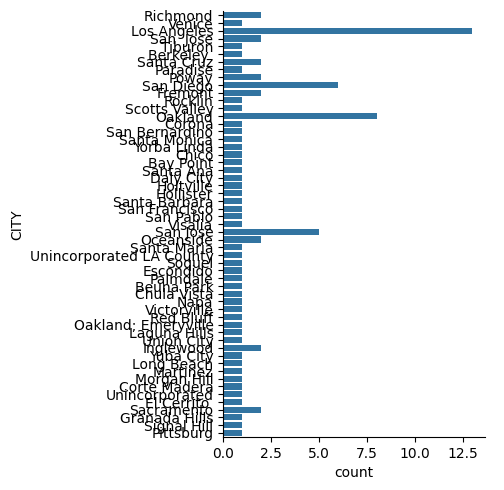

In [173]:
sb.catplot(data = merged_df, y = "CITY", kind = "count")

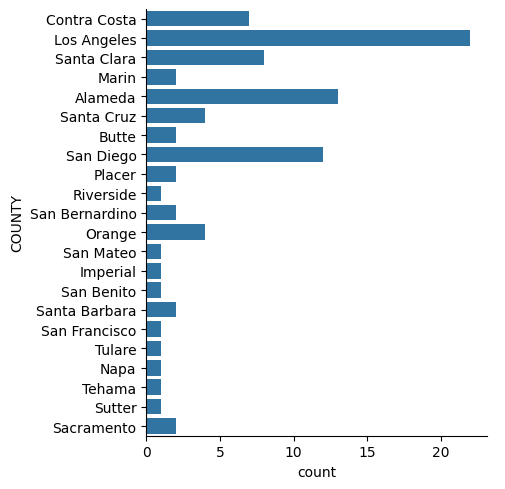

In [167]:
sb.catplot(data = merged_df, y = "COUNTY", kind = "count")

/home/dsfee222/.virtualenvs/affordable_housing/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)


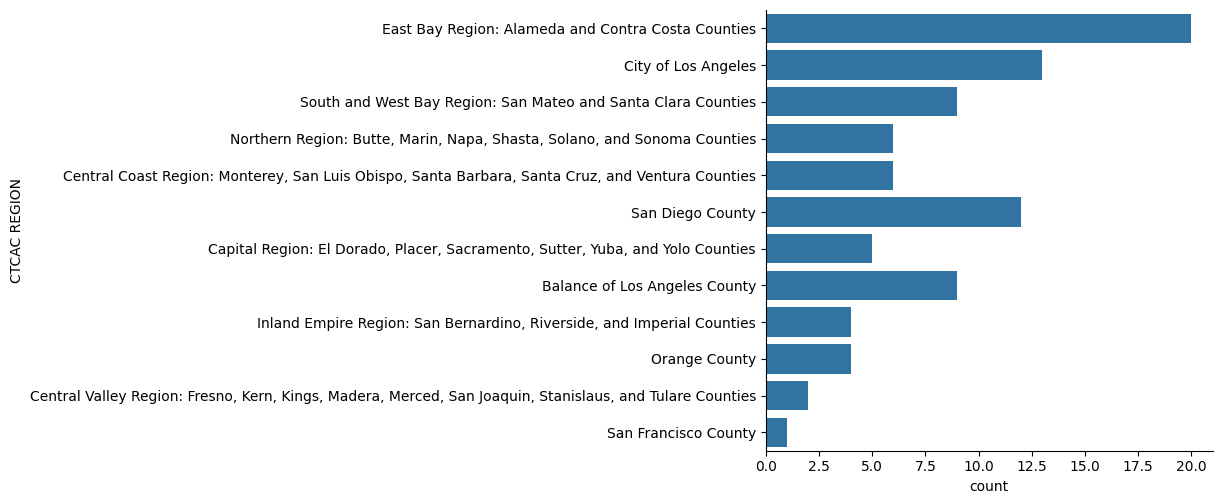

In [168]:
sb.catplot(data = merged_df, y = "CTCAC REGION", kind = "count")

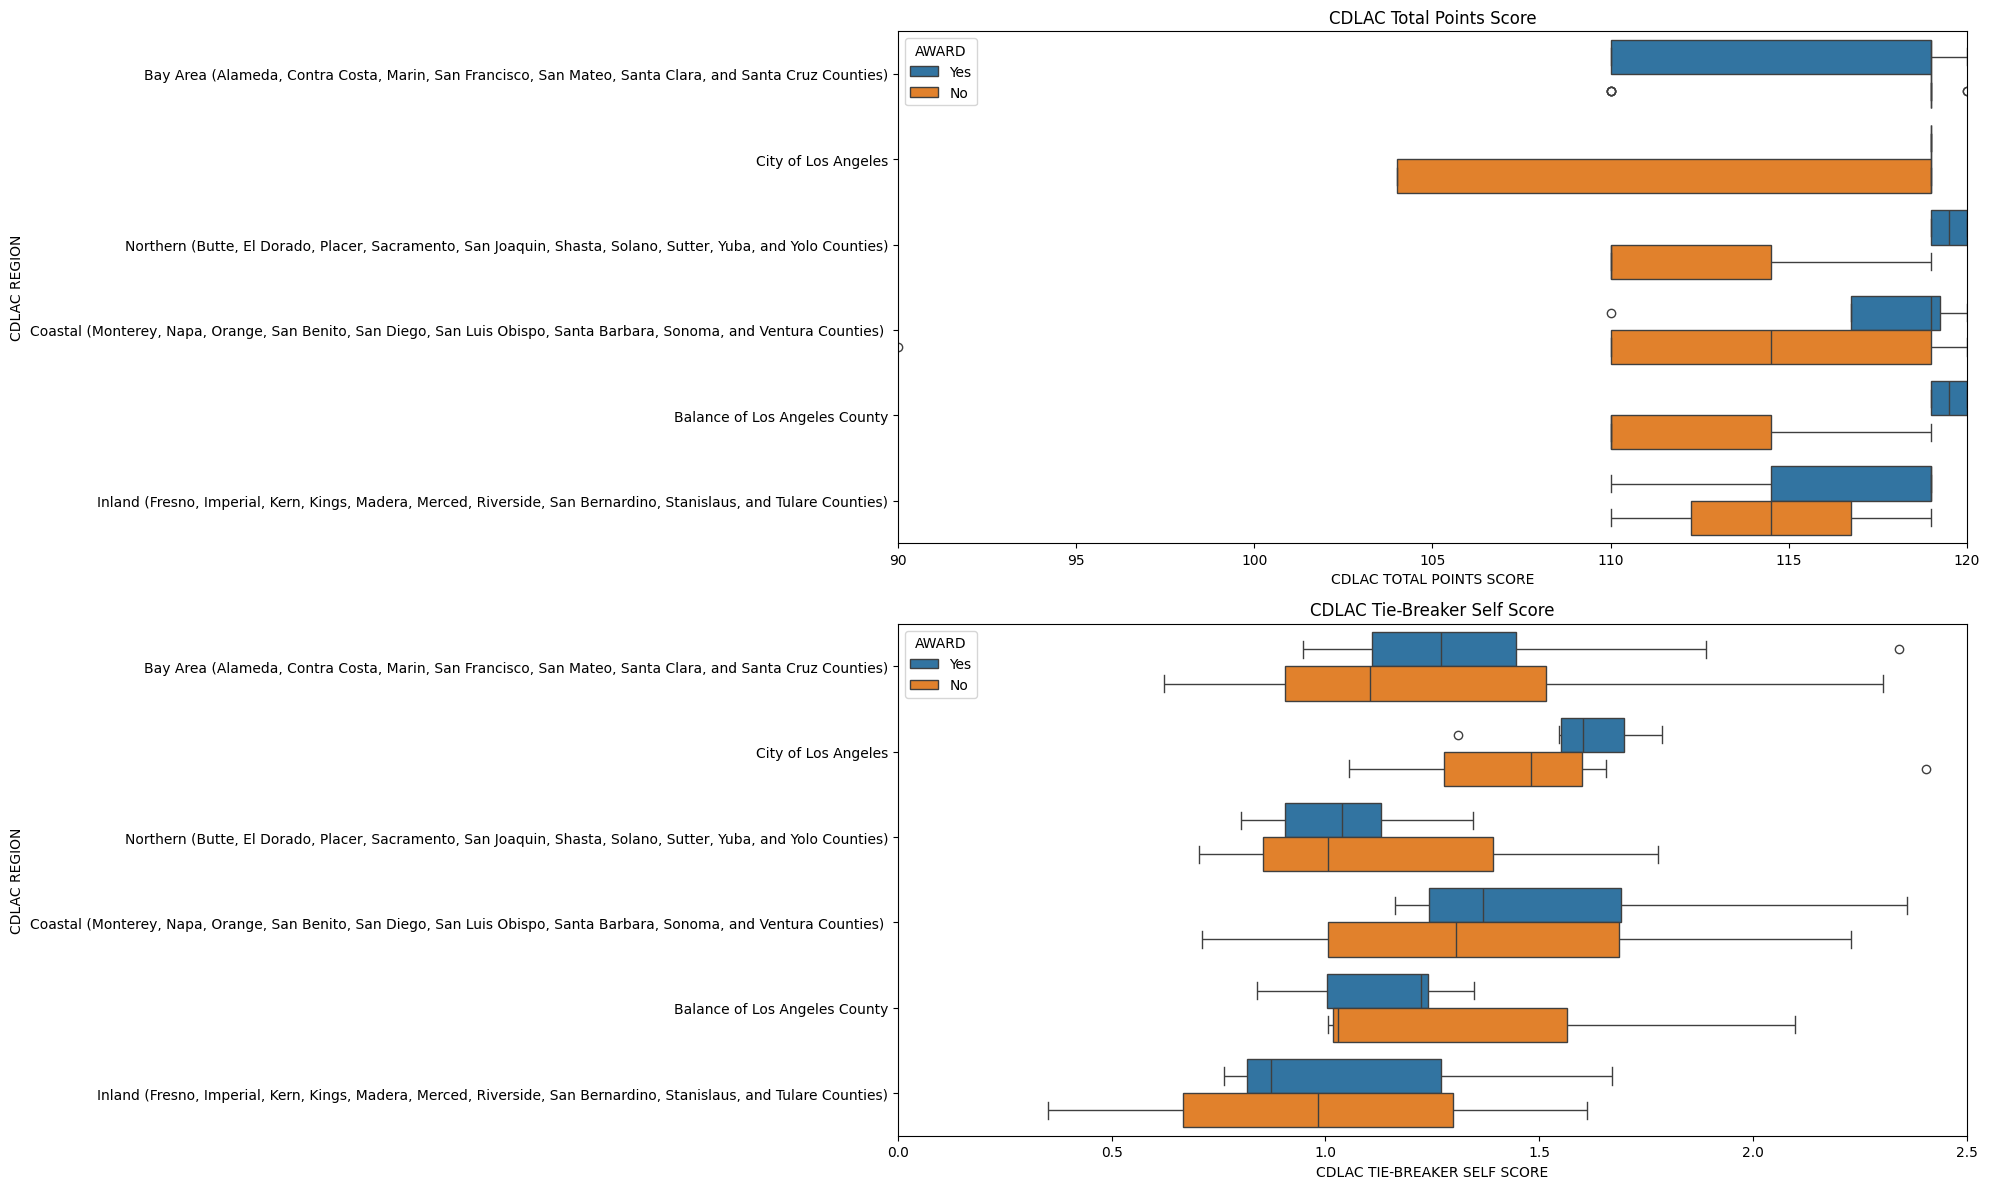

In [170]:
# Create a 2x1 subplot grid
f, axes = plt.subplots(2, 1, figsize=(20, 12))

# Plot the first boxplot (CDLAC TOTAL POINTS SCORE) on the first subplot
sb.boxplot(data=merged_df, x='CDLAC TOTAL POINTS SCORE', y = "CDLAC REGION", orient='h', ax=axes[0], hue = "AWARD")
axes[0].set_title('CDLAC Total Points Score')
axes[0].set_xlim(90, 120)
# Plot the second boxplot (CDLAC TIE-BREAKER SELF SCORE) on the second subplot
sb.boxplot(data=merged_df, x='CDLAC TIE-BREAKER SELF SCORE', y = "CDLAC REGION", orient='h', ax=axes[1], hue = "AWARD")
axes[1].set_title('CDLAC Tie-Breaker Self Score')
axes[1].set_xlim(0, 2.5)
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

# Refactoring preprocessing to Python Script
- Steps for preprocessing: 
  - reading into pandas df the two excels with proper headers
  - pick out only the important columns from award_list
  - Merge the important columns into applicant_data
  - Fix the NaN values produced during merge and in some columns

Python Script is stored be at affordable_housing/dataset.py
- The point of this is to avoid reusing code in future notebooks and for better source control

# Creating preprocessed dataset

In [1]:
from affordable_housing.dataset import main

2025-06-06 13:36:18.972 | INFO     | affordable_housing.config:<module>:11 - PROJ_ROOT path is: /home/dsfee222/affordable_housing


In [2]:
main()

2025-06-06 13:36:21.359 | INFO     | affordable_housing.dataset:main:29 - Starting dataset processing...
2025-06-06 13:36:21.364 | INFO     | affordable_housing.dataset:main:33 - Loading first Excel file from /home/dsfee222/affordable_housing/data/external/award_list.xlsx
2025-06-06 13:36:21.531 | INFO     | affordable_housing.dataset:main:35 - Loaded first dataset with 38 rows and 42 columns
2025-06-06 13:36:21.531 | INFO     | affordable_housing.dataset:main:37 - Loading second Excel file from /home/dsfee222/affordable_housing/data/external/2025-Applicant-list-4-per-R1.xlsx
2025-06-06 13:36:21.655 | INFO     | affordable_housing.dataset:main:40 - Loaded second dataset with 91 rows and 46 columns
2025-06-06 13:36:21.656 | INFO     | affordable_housing.dataset:main:42 - Extracting important columns from /home/dsfee222/affordable_housing/data/external/award_list.xlsx
2025-06-06 13:36:21.665 | INFO     | affordable_housing.dataset:main:49 - Important columns are ['APPLICATION NUMBER', 'N